<a href="https://colab.research.google.com/github/MadhuriKonnur/Women_in_loop/blob/master/learnx_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ref https://medium.com/@hpriya206/sales-prediction-using-python-for-machine-learning-6a76e4d63e71

https://github.com/MadhuriKonnur/internShowcase/blob/master/atharvajoshi10%40gmail.com/Project/House%20Price1.ipynb

https://github.com/MadhuriKonnur/internShowcase/blob/master/garora039%40gmail.com/House%20price%20prediction%20using%20Keras.ipynb


by Madhuri Konnur

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [0]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# Data  dependencies
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

access data from google  drive , for  example  from  drive  go to sharable  links  of  ( .csv files ) .
Take  test  and  train  data  csv files  shareable  links.
paste  it  and  take  out  id's 

 train- https://drive.google.com/open?id=15gIys8iV543giOEpYYcPAuEbVF5PyCzx
 test-https://drive.google.com/open?id=1LN7D2vUNP3K1UwPCG-Nm0aVNJ3TfRUQC
 submission_

In [0]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#Google drive  data access
train_downloaded=drive.CreateFile({'id':'15gIys8iV543giOEpYYcPAuEbVF5PyCzx'})
train_downloaded.GetContentFile('train.csv')
test_downloaded=drive.CreateFile({'id':'1LN7D2vUNP3K1UwPCG-Nm0aVNJ3TfRUQC'})
test_downloaded.GetContentFile('test.csv')


In [0]:
submissionL_downloaded=drive.CreateFile({'id':'1u8-PfO6VzVPVaeT-mVl1dzuqxnz-gwos'})
submissionL_downloaded.GetContentFile('sample_submission_linear.csv')

In [0]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [66]:
train.head(3)

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004,0.007,81
1,2,2,1,Development,Course,0,0,1,13650,0.007,79
2,3,3,1,Development,Course,0,0,1,11655,0.007,75


In [67]:
test.head(3)

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric
0,883,883,1,Development,Course,1,0,1,0.007
1,884,884,1,Development,Course,1,0,1,0.007
2,885,885,1,Development,Course,1,0,1,0.007


For  test  dataset  there absence  of  "User_Traffic"

In [68]:
# check out the size of the data
print("Train data shape:", train.shape)
print("Test data shape:", test.shape)

Train data shape: (512087, 11)
Test data shape: (36000, 9)


In [0]:
# check the data set information using the info() command. 
#train.info()

In [70]:
train.describe()

,ID,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
count,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,510323.000000,512087.000000
mean,274007.300650,434.917869,300.388344,0.380244,0.031639,0.488968,15375.101198,0.073345,120.826924
std,158228.834029,256.044161,173.365787,0.485447,0.175038,0.499879,7727.231205,0.100115,54.355258
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000
25%,136962.500000,214.000000,150.000000,0.000000,0.000000,0.000000,10584.000000,0.010000,84.000000
50%,273984.000000,427.000000,300.000000,0.000000,0.000000,0.000000,13776.000000,0.035000,111.000000
75%,411065.500000,658.000000,451.000000,1.000000,0.000000,1.000000,18123.000000,0.094000,146.000000
max,548027.000000,882.000000,600.000000,1.000000,1.000000,1.000000,100002.000000,0.768000,682.000000


**Target variable**
analysis on target variable

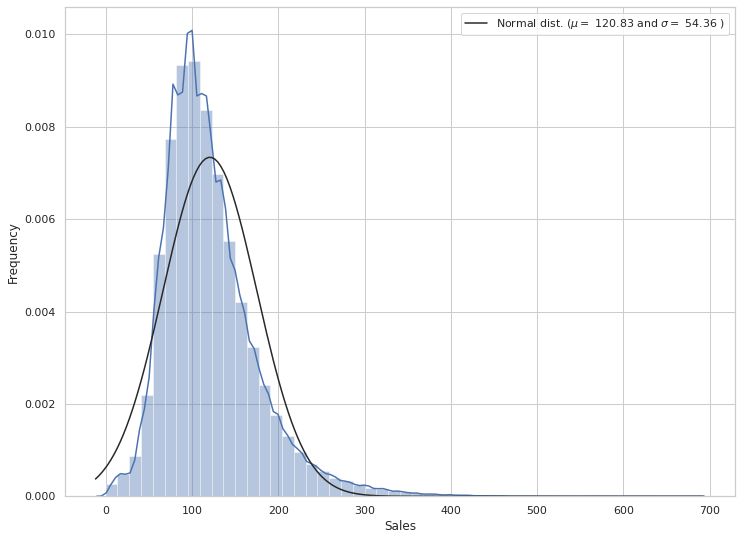

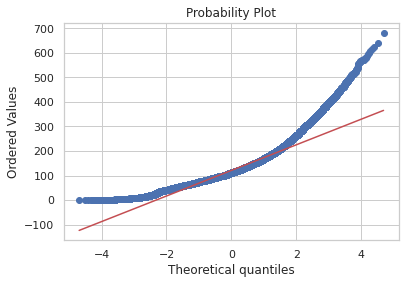

In [71]:
plt.subplots(figsize=(12,9))
sns.distplot(train['Sales'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(train['Sales'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(train['Sales'], plot=plt)
plt.show()

In [72]:
print("Skew is:",train.Sales.skew())
print("Kurtosis: %f" % train.Sales.kurt())

Skew is: 1.374769816079381
Kurtosis: 3.609506


This target varibale is right skewed. Now, we need to tranform this variable and make it normal distribution.

**Using log for target variable to make more normal distribution**

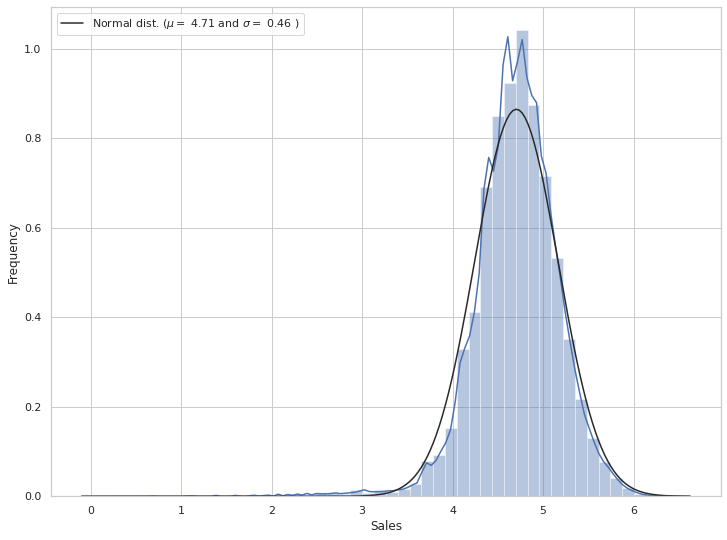

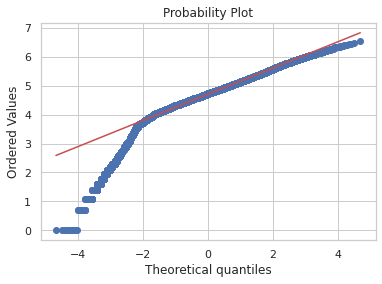

In [73]:

#we use log function which is in numpy
train['Sales'] = np.log1p(train['Sales'])

#Check again for more normal distribution

plt.subplots(figsize=(12,9))
sns.distplot(train['Sales'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(train['Sales'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(train['Sales'], plot=plt)
plt.show()

After analyzing the target variable graph we move on to seeing which of the predictor features are numeric.

In [74]:
numeric_features=train.select_dtypes(include=[np.number])
numeric_features.dtypes

ID                      int64
Day_No                  int64
Course_ID               int64
Short_Promotion         int64
Public_Holiday          int64
Long_Promotion          int64
User_Traffic            int64
Competition_Metric    float64
Sales                 float64
dtype: object

Correlation between numerical predictors and the target variable:

In [75]:
corr=numeric_features.corr()
corr

,ID,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
ID,1.000000,0.001052,0.999996,-0.000005,0.001274,-0.039570,0.033604,-0.007431,0.019975
Day_No,0.001052,1.000000,-0.000506,0.014645,0.019112,-0.020204,0.021511,0.003229,0.051783
Course_ID,0.999996,-0.000506,1.000000,-0.000027,0.001242,-0.039605,0.033520,-0.007385,0.019872
Short_Promotion,-0.000005,0.014645,-0.000027,1.000000,-0.018770,-0.001149,0.198785,0.000182,0.372352
Public_Holiday,0.001274,0.019112,0.001242,-0.018770,1.000000,0.008319,-0.108305,-0.000491,-0.233028
Long_Promotion,-0.039570,-0.020204,-0.039605,-0.001149,0.008319,1.000000,-0.204289,-0.119382,-0.093620
User_Traffic,0.033604,0.021511,0.033520,0.198785,-0.108305,-0.204289,1.000000,-0.148775,0.754633
Competition_Metric,-0.007431,0.003229,-0.007385,0.000182,-0.000491,-0.119382,-0.148775,1.000000,-0.017978
Sales,0.019975,0.051783,0.019872,0.372352,-0.233028,-0.093620,0.754633,-0.017978,1.000000


In [76]:
print(corr['Sales'].sort_values(ascending=False))

Sales                 1.000000
User_Traffic          0.754633
Short_Promotion       0.372352
Day_No                0.051783
ID                    0.019975
Course_ID             0.019872
Competition_Metric   -0.017978
Long_Promotion       -0.093620
Public_Holiday       -0.233028
Name: Sales, dtype: float64


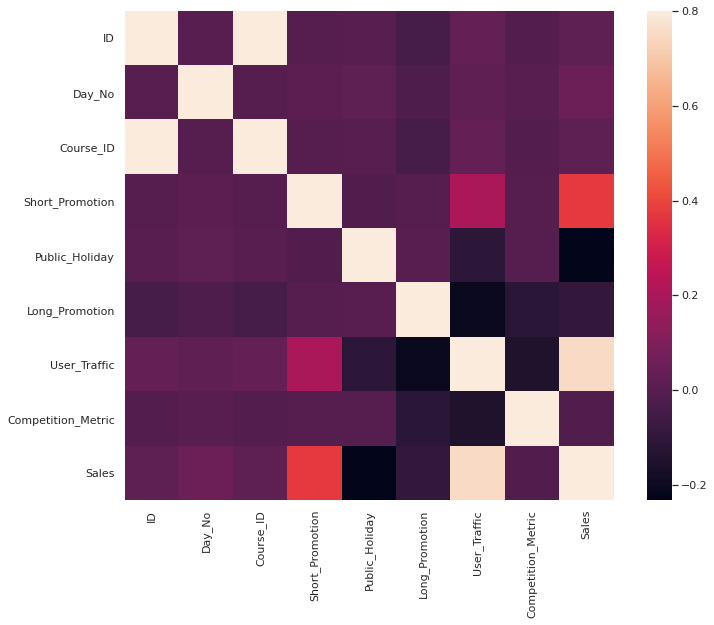

In [77]:
#Correlation matrix generation:

f,ax=plt.subplots(figsize=(12,9))
sns.heatmap(corr,vmax=.8,square= True)

From the current numeric variables we can observe that the 'Public_Holiday' ,'Long_Promotion ' and 'Competition_Metric ' are the features with the lowest correlation with our target variable. Therefore, the less values for these features, higher the price will be. Further,the most positive correlation are that of User_Traffic and Short_Promotion

In [78]:
train['User_Traffic'].corr(train['Long_Promotion'])

-0.2042886951384124

we can observe that the'Long_Promotion ' is negatively correlated with' User_Traffic'

(As 'Long_Promotion' increases 'User_Traffic' decreases)

We make use of data visualization library sns and get the plot of 'Long_Promotion' which consist of two features: 1 and 0

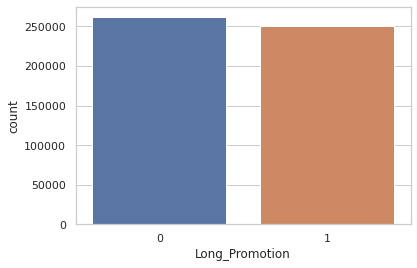

In [79]:
sns.countplot(train.Long_Promotion)

Distribution of the variable Course_Domain:

When looking at the Course_Domain it is understood that there are 4 types of unique domain with different categorical values.

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

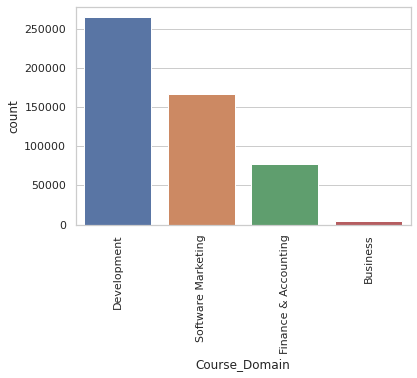

In [80]:
sns.countplot(train.Course_Domain)
plt.xticks(rotation=90)

Here Learnx provides more courses on Development

Distribution of the variable Course_Type:

When looking at the Course_Type it is understood that there are 3 types of unique domain with different categorical values.

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

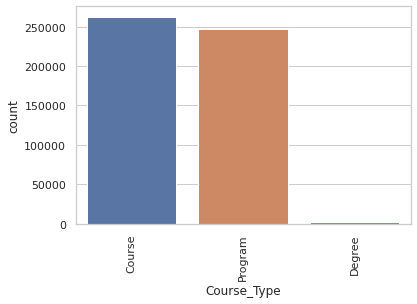

In [81]:
sns.countplot(train.Course_Type)
plt.xticks(rotation=90)

LearnX has course_type more focused on course . then program least on Degree

1.2)Bivariate Analysis: Analyzing more than one feature to form a relationship between the target variable and it’s predictors.Here we make use of 'Sales' which is combined with other variables. It was seen that 'Public_Holiday' had low correlation with the target variable so it is combined with 'Sales'. The plot obtained is seen below.

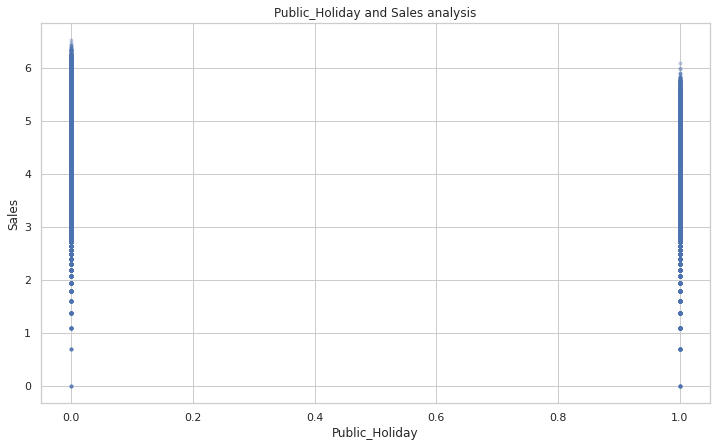

In [82]:
plt.figure(figsize=(12,7))
plt.xlabel('Public_Holiday')
plt.ylabel('Sales')
plt.title('Public_Holiday and Sales analysis')
plt.plot(train.Public_Holiday,train.Sales,'.',alpha=0.3)

It was seen that 'Long_Promotion' had low correlation with the target variable so it is combined with 'Sales'. The plot obtained is seen below.

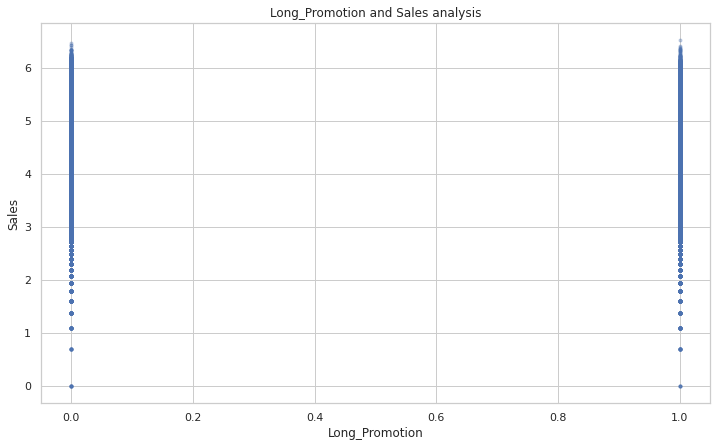

In [83]:
plt.figure(figsize=(12,7))
plt.xlabel('Long_Promotion')
plt.ylabel('Sales')
plt.title('Long_Promotion and Sales analysis')
plt.plot(train.Long_Promotion,train.Sales,'.',alpha=0.3)

No much impact  on Long_Promotion  either 0  or  1  on target Sales

It was seen that 'Competition_Metric' had low correlation with the target variable so it is combined with 'Sales'. The plot obtained is seen below.

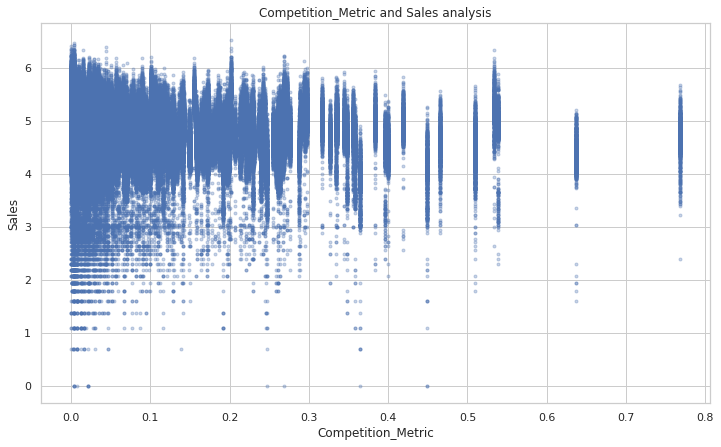

In [84]:
plt.figure(figsize=(12,7))
plt.xlabel('Competition_Metric')
plt.ylabel('Sales')
plt.title('Competition_Metric and Sales analysis')
plt.plot(train.Competition_Metric,train.Sales,'.',alpha=0.3)

From these graphs  'Public_Holiday' has  impact on  'Sales' and  certain level ' Competition_Metric'
when Public_Holiday =0  sales are more

Categorical Variables:
 Now,moving on to categorical variables such as Course_Domain. This contains 4 values.This is combined with Sales for plotting bar chart.

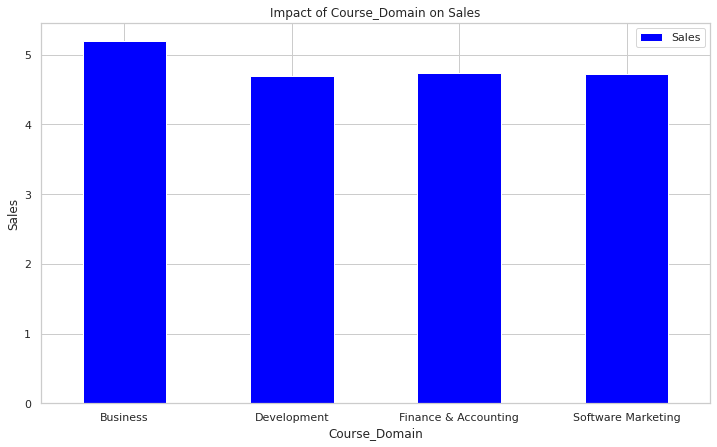

In [85]:
Course_Domain_pivot=\
train.pivot_table(index='Course_Domain',values='Sales',aggfunc=np.median)
Course_Domain_pivot.plot(kind='bar',color='blue',figsize=(12,7))
plt.xlabel('Course_Domain')
plt.ylabel('Sales')
plt.title('Impact of Course_Domain on Sales')
plt.xticks(rotation=0)
plt.show()

Course_Type and Sales:

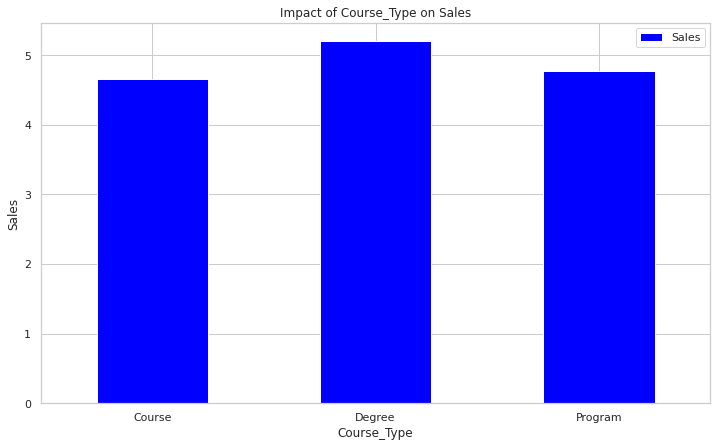

In [86]:
Course_Type_pivot=\
train.pivot_table(index='Course_Type',values='Sales',aggfunc=np.median)
Course_Type_pivot.plot(kind='bar',color='blue',figsize=(12,7))
plt.xlabel('Course_Type')
plt.ylabel('Sales')
plt.title('Impact of Course_Type on Sales')
plt.xticks(rotation=0)
plt.show()

From above bar graphs Course_Domain=Business and Course_Type= Degree has more Sales impact. Rest Course_Domain and Course_Type has moderate impact

make use of pivot_table function which is used to group through the data given above

From Data Exploration or analysis there were some conclusions,now moving on to pre-processing of other attributes.

it was split into train and test dataset. The above analysis was performed using train dataset. To work further, I have combined the test and train dataset into data

In [87]:
y=train.Sales
train=train.drop(columns={'Sales'},axis=1)
data=pd.concat([train,test],ignore_index=True)
print(train.shape, test.shape,data.shape)

(512087, 10) (36000, 9) (548087, 10)


**Handling the  missing  values**

In [88]:
#Let's check if the data set has any missing values.

#We check for NaN values which are displayed in percent format.

data.isnull().sum()/data.shape[0]*100

ID                    0.000000
Day_No                0.000000
Course_ID             0.000000
Course_Domain         0.000000
Course_Type           0.000000
Short_Promotion       0.000000
Public_Holiday        0.000000
Long_Promotion        0.000000
User_Traffic          6.568300
Competition_Metric    0.343741
dtype: float64

It is analyzed that User_Traffic and Competition_Metric had missing values or Null in Data Analysis.I have imputed the missing value based on neibhouring values using KNNImputer

Observation  both missing  features  are  in numberic by nature.

In [0]:
# for User_Traffic 
from sklearn.impute import KNNImputer
nan = np.nan
User_Traf=data.User_Traffic
imputer = KNNImputer(n_neighbors=2, weights="uniform")
UserT=imputer.fit_transform(User_Traf.values.reshape(-1, 1))

In [94]:
UserT


array([[11004.        ],
       [13650.        ],
       [11655.        ],
       ...,
       [15375.10119765],
       [15375.10119765],
       [15375.10119765]])

In [0]:
data.User_Traffic=UserT

In [0]:
# for Competition_Metric 
from sklearn.impute import KNNImputer
nan = np.nan
Com_Metric=data.User_Traffic
imputer = KNNImputer(n_neighbors=2, weights="uniform")
ComM=imputer.fit_transform(Com_Metric.values.reshape(-1, 1))

In [99]:
ComM

array([[11004.        ],
       [13650.        ],
       [11655.        ],
       ...,
       [15375.10119765],
       [15375.10119765],
       [15375.10119765]])

In [0]:
data.Competition_Metric=ComM

In [101]:
data.isnull().sum()

ID                    0
Day_No                0
Course_ID             0
Course_Domain         0
Course_Type           0
Short_Promotion       0
Public_Holiday        0
Long_Promotion        0
User_Traffic          0
Competition_Metric    0
dtype: int64

No more missing values are there in the dataset, so now we can proceed further.

In [0]:
# Finding the number of categorical columns and numerical columns in the data set

cat_col = []
num_col = []

cat = data.select_dtypes(include=['object'])
num = data.select_dtypes(exclude=['object'])

for col in cat.columns:
    cat_col.append(col)
    
for col in num.columns:
    num_col.append(col)

In [109]:
print('No. of categorical columns: ', len(cat_col))
print('No. of numerical columns: ', len(num_col))

No. of categorical columns:  2
No. of numerical columns:  8


In [0]:
data = data[num_col + cat_col]

In [111]:
from sklearn.preprocessing import LabelEncoder

def oneHotEncode(data,colNames):
    for col in colNames:
        if( data[col].dtype == np.dtype('object')):
            dummies = pd.get_dummies(data[col],prefix=col)
            data = pd.concat([data,dummies],axis=1)

            #drop the encoded column
            data.drop([col],axis = 1 , inplace=True)
    return data

    
print('There were {} columns before encoding categorical features'.format(data.shape[1]))
data = oneHotEncode(data, cat_col)
print('There are {} columns after encoding categorical features'.format(data.shape[1]))

There were 10 columns before encoding categorical features
There are 15 columns after encoding categorical features


512087

Dividing data back into train and test

In [116]:
train=data[:512087]
test=data[512087:]
print(train.shape, test.shape)

(512087, 15) (36000, 15)


In [0]:
#Take their values in X and y
X = train.values
y = y.values

In [0]:
# Split data into train and test formate
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

Applying models

Linear Regression

In [0]:
#Train the model
from sklearn import linear_model
model = linear_model.LinearRegression()

In [120]:
#Fit the model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [121]:
#Prediction
# let us  comapare 142  test value
print("Predict value " + str(model.predict([X_test[142]])))
print("Real value " + str(y_test[142]))

Predict value [5.55721686]
Real value 5.288267030694535


R^2 is: 
 0.7284467319191625
24 

RMSE is: 
 0.057517850076106984
25 



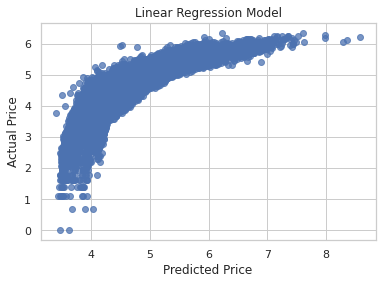

In [123]:

# ---- Evaluate the performance and visualize results
# r-squared value is a measure of how close the data are to the fitted regression line
# a higher r-squared value means a better fit(very close to value 1)
print("R^2 is: \n", model.score(X_test, y_test))

# use the model we have built to make predictions on the test data set.
predictions1 = model.predict(X_test)

print("24 \n")
# calculates the rmse
from sklearn.metrics import mean_squared_error
print('RMSE is: \n', mean_squared_error(y_test, predictions1))

print("25 \n")
# view this relationship between predictions and actual_values graphically with a scatter plot.
actual_values1 = y_test
plt.scatter(predictions1, actual_values1, alpha=.75,
            color='b')  # alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [0]:
#Coralation plot
corr = train_corr.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)




In [0]:
#to return a list of the unique values
top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = train[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [0]:
#Here OverallQual is highly correlated with target feature of saleprice by 82%

#unique value of OverallQual
train.OverallQual.unique()

In [0]:
sns.barplot(train.OverallQual, train.SalePrice)

In [0]:

#boxplot
plt.figure(figsize=(18, 8))
sns.boxplot(x=train.OverallQual, y=train.SalePrice)


In [0]:
col = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt','YearRemodAdd', 'GarageYrBlt', 'TotRmsAbvGrd']
sns.set(style='ticks')
sns.pairplot(train[col], size=3, kind='reg')

In [0]:
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice

**Imputting missing values**

In [0]:
# PoolQC has missing value ratio is 99%+. So, there is fill by None
train['PoolQC'] = train['PoolQC'].fillna('None')

In [0]:
#Arround 50% missing values attributes have been fill by None
train['MiscFeature'] = train['MiscFeature'].fillna('None')
train['Alley'] = train['Alley'].fillna('None')
train['Fence'] = train['Fence'].fillna('None')
train['FireplaceQu'] = train['FireplaceQu'].fillna('None')

In [0]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
train['LotFrontage'] = train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [0]:

#GarageType, GarageFinish, GarageQual and GarageCond these are replacing with None
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    train[col] = train[col].fillna('None')

In [0]:
#GarageYrBlt, GarageArea and GarageCars these are replacing with zero
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    train[col] = train[col].fillna(int(0))

In [0]:
#BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual these are replacing with None
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    train[col] = train[col].fillna('None')

In [0]:
#MasVnrArea : replace with zero
train['MasVnrArea'] = train['MasVnrArea'].fillna(int(0))

In [0]:
#MasVnrType : replace with None
train['MasVnrType'] = train['MasVnrType'].fillna('None')

In [0]:
#There is put mode value 
train['Electrical'] = train['Electrical'].fillna(train['Electrical']).mode()[0]

In [0]:

#There is no need of Utilities
train = train.drop(['Utilities'], axis=1)

In [0]:
#Checking there is any null value or not
plt.figure(figsize=(10, 5))
sns.heatmap(train.isnull())

Now, there is no more missing values

**Encoding string  to intiger**

In [0]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'GarageType', 'MiscFeature', 
        'SaleType', 'SaleCondition', 'Electrical', 'Heating')

In [0]:
from sklearn.preprocessing import LabelEncoder
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].values)) 
    train[c] = lbl.transform(list(train[c].values))

**Data preparation  for prediction**

In [0]:
#X = train[['OverallQual','GrLivArea', 'GarageCars','GarageArea','TotalBsmtSF','YrSold']]
#X = train[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']]
X =train[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt','YearRemodAdd', 'GarageYrBlt', 'TotRmsAbvGrd']]

y = train['SalePrice']

In [0]:
#======= partition the data ===================================================================================================#
#   Partitioning the data in this way allows us to evaluate how our model might perform on data that it has never seen before.
#   If we train the model on all of the test data, it will be difficult to tell if overfitting has taken place.
#==============================================================================================================================#
# also state how many percentage from train data set, we want to take as test data set
# In this example, about 33% of the data is devoted to the hold-out set.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.20)

**Applying  models**

***Linear Regression***

In [0]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [0]:
# ---- fit the model / Model fitting
# lr.fit() method will fit the linear regression on the features and target variable that we pass.
model = lr.fit(X_train, y_train)

In [0]:
#  coeffients  of  selected  independent variables

model.coef_

In [0]:
model.intercept_

In [0]:
# ---- Evaluate the performance and visualize results
# r-squared value is a measure of how close the data are to the fitted regression line
# a higher r-squared value means a better fit(very close to value 1)
print("R^2 is: \n", model.score(X_test, y_test))

# use the model we have built to make predictions on the test data set.
predictions = model.predict(X_test)

print("24 \n")
# calculates the rmse
from sklearn.metrics import mean_squared_error
print('RMSE is: \n', mean_squared_error(y_test, predictions))

print("25 \n")
# view this relationship between predictions and actual_values graphically with a scatter plot.
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b')  # alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()


In [0]:
#Score/Accuracy
print("Accuracy --> ", model.score(X_test, y_test)*100)

***RandomForestRegression***

In [0]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000)

In [0]:
#Fit
model.fit(X_train, y_train)

In [0]:
#Score/Accuracy
print("Accuracy --> ", model.score(X_test, y_test)*100)

***GradientBoostingRegressor***

In [0]:
#Train the model
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)

In [0]:
#Fit
GBR.fit(X_train, y_train)

In [0]:

print("Accuracy --> ", GBR.score(X_test, y_test)*100)

***Ordinary Least Squares (OLS) regression*** 

In [0]:
import statsmodels.api as sm
import seaborn as sns

In [0]:
X1 = sm.add_constant(X)
est = sm.OLS(y, X1).fit()

est.summary()

For OSL R2  squared  is  82 %